<a href="https://colab.research.google.com/github/kroniz-utab/Webinar-Upgrade-Skill-Intro-to-ML/blob/master/Messy_Clean_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import drive dari library google colab untuk menghubungkan dengan drive
from google.colab import drive

# hubungkan dengan google drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
# mengimport library os
import os
# mengatur dir untuk kaggle di gdrive
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/my_kaggle"

In [ ]:
# memindahkan direktori file ke dalam folder my_kaggle
%cd /content/gdrive/My Drive/my_kaggle

# cek folder dan isi dari direktori
!ls

/content/gdrive/My Drive/my_kaggle
kaggle.json


In [ ]:
# mendownload semua dataset yang ada pada kaggle lalu menyimpan pada drive
# silahkan jadikan komentar seperti baris ini jika berhasil mendownload
# hal ini bertujuan untuk file tidak terdownload lagi ketika mengulangi runtime
# atau reset runtime

# !kaggle datasets download -d cdawn1/messy-vs-clean-room
!ls

kaggle.json  messy-vs-clean-room.zip


In [ ]:
# meng-unzip (mengekstrak file zip) pada drive, kemudian menghapus file zip pada drive
# lakukan hal yang sama seperti cell sebelumnya jika telah selesai
!unzip \*.zip  && rm *.zip
!ls

Archive:  messy-vs-clean-room.zip
  inflating: images/images/test/0.png  
  inflating: images/images/test/1.png  
  inflating: images/images/test/2.png  
  inflating: images/images/test/3.png  
  inflating: images/images/test/4.png  
  inflating: images/images/test/5.png  
  inflating: images/images/test/6.png  
  inflating: images/images/test/7.png  
  inflating: images/images/test/8.png  
  inflating: images/images/test/9.png  
  inflating: images/images/train/clean/0.png  
  inflating: images/images/train/clean/1.png  
  inflating: images/images/train/clean/10.png  
  inflating: images/images/train/clean/11.png  
  inflating: images/images/train/clean/12.png  
  inflating: images/images/train/clean/13.png  
  inflating: images/images/train/clean/14.png  
  inflating: images/images/train/clean/15.png  
  inflating: images/images/train/clean/16.png  
  inflating: images/images/train/clean/17.png  
  inflating: images/images/train/clean/18.png  
  inflating: images/images/train/clean/1

In [ ]:
%cd /content/gdrive/My Drive/my_kaggle/images
!ls

/content/gdrive/My Drive/my_kaggle/images
images	test  train  val


In [ ]:
import os
base_dir = '/content/gdrive/My Drive/my_kaggle/images'
train_dir = os.path.join(base_dir,'train') # /content/gdrive/My Drive/my_kaggle/images/train
validation_dir = os.path.join(base_dir,'val') # /content/gdrive/My Drive/my_kaggle/images/val

In [ ]:
os.listdir(train_dir)

['clean', 'messy']

In [ ]:
os.listdir(validation_dir)

['clean', 'messy']

In [ ]:
# membuat direktori ruangan rapi pada direktori data train
train_clean_dir = os.path.join(train_dir,'clean')

# membuat direktori ruangan berantakan pada direktori data train
train_messy_dir = os.path.join(train_dir,'messy')

# membuat direktori ruangan rapi pada direktori data val
val_clean_dir = os.path.join(validation_dir,'clean')

# membuat direktori ruangan berantakan pada direktori data val
val_messy_dir = os.path.join(validation_dir,'messy')

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   horizontal_flip = True,
                                   shear_range = 0.2,
                                   fill_mode = 'nearest')

test_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   horizontal_flip = True,
                                   shear_range = 0.2,
                                   fill_mode = 'nearest')

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150,150),
                                                    batch_size=4,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150,150),
                                                        batch_size=4,
                                                        class_mode='binary')

Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [ ]:
from keras.layers import Conv2D, MaxPool2D, Flatten, Dropout, Dense
from keras.models import Sequential

model = Sequential()

model.add(Conv2D(32,(3,3), activation='relu',input_shape=(150,150,3)))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPool2D(2,2))
# model.add(Dropout(0.2))

model.add(Conv2D(128,(3,3), activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(128,(3,3), activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)      

In [ ]:
from keras.callbacks import ModelCheckpoint

filename = 'model.h1.8-8-20'
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

history =  model.fit(train_generator,
                      steps_per_epoch=20,
                      epochs=75,
                      validation_data=validation_generator,
                      validation_steps=5,
                      verbose=2,
                      callbacks=[checkpoint])

Epoch 1/75

Epoch 00001: val_loss improved from inf to 0.69278, saving model to model.h1.8-8-20
INFO:tensorflow:Assets written to: model.h1.8-8-20/assets
20/20 - 2s - loss: 0.7358 - accuracy: 0.4875 - val_loss: 0.6928 - val_accuracy: 0.5000
Epoch 2/75

Epoch 00002: val_loss improved from 0.69278 to 0.69047, saving model to model.h1.8-8-20
INFO:tensorflow:Assets written to: model.h1.8-8-20/assets
20/20 - 2s - loss: 0.6911 - accuracy: 0.5750 - val_loss: 0.6905 - val_accuracy: 0.5000
Epoch 3/75

Epoch 00003: val_loss did not improve from 0.69047
20/20 - 1s - loss: 0.7333 - accuracy: 0.5125 - val_loss: 0.6917 - val_accuracy: 0.5000
Epoch 4/75

Epoch 00004: val_loss did not improve from 0.69047
20/20 - 1s - loss: 0.6882 - accuracy: 0.5750 - val_loss: 0.7102 - val_accuracy: 0.5000
Epoch 5/75

Epoch 00005: val_loss improved from 0.69047 to 0.68744, saving model to model.h1.8-8-20
INFO:tensorflow:Assets written to: model.h1.8-8-20/assets
20/20 - 2s - loss: 0.6975 - accuracy: 0.5750 - val_loss:

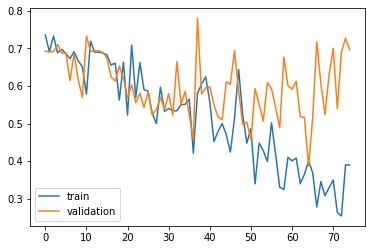

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','validation'])
plt.show()

In [ ]:
%cd /content/gdrive/My Drive/my_kaggle/images/test
!ls

/content/gdrive/My Drive/my_kaggle/images/test
0.png  1.png  2.png  3.png  4.png  5.png  6.png  7.png	8.png  9.png


clean


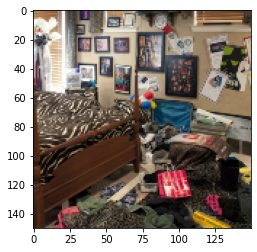

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.models import load_model
%matplotlib inline
import glob

model = load_model('/content/gdrive/My Drive/my_kaggle/images/model.h1.8-8-20')
picture = glob.glob('/content/gdrive/My Drive/my_kaggle/images/test/8.png')

for fn in picture:
  #predict images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x,axis=0)

  images = np.vstack([x])
  classes = model.predict_classes(images,batch_size=10)
  if classes == 0:
    print('clean')
  else:
    print('messy')